## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing the dataset

In [3]:
dataset = pd.read_csv("/Users/sushantkumar/Desktop/Trainings/Sprint_2/diabetes.csv")

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [7]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Visualising the dataset

In [8]:
dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


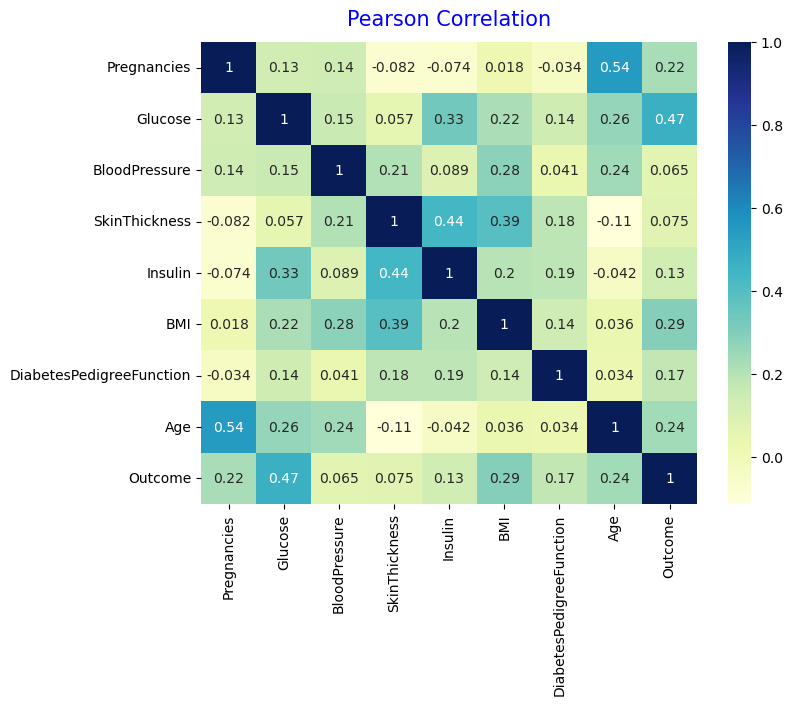

In [9]:
plt.figure(figsize = (8,6))
sns.heatmap(dataset.corr(numeric_only = True), annot = True, cmap = 'YlGnBu')
plt.title("Pearson Correlation", fontsize = 15, color = 'b', pad = 12, loc = 'center')
plt.show()

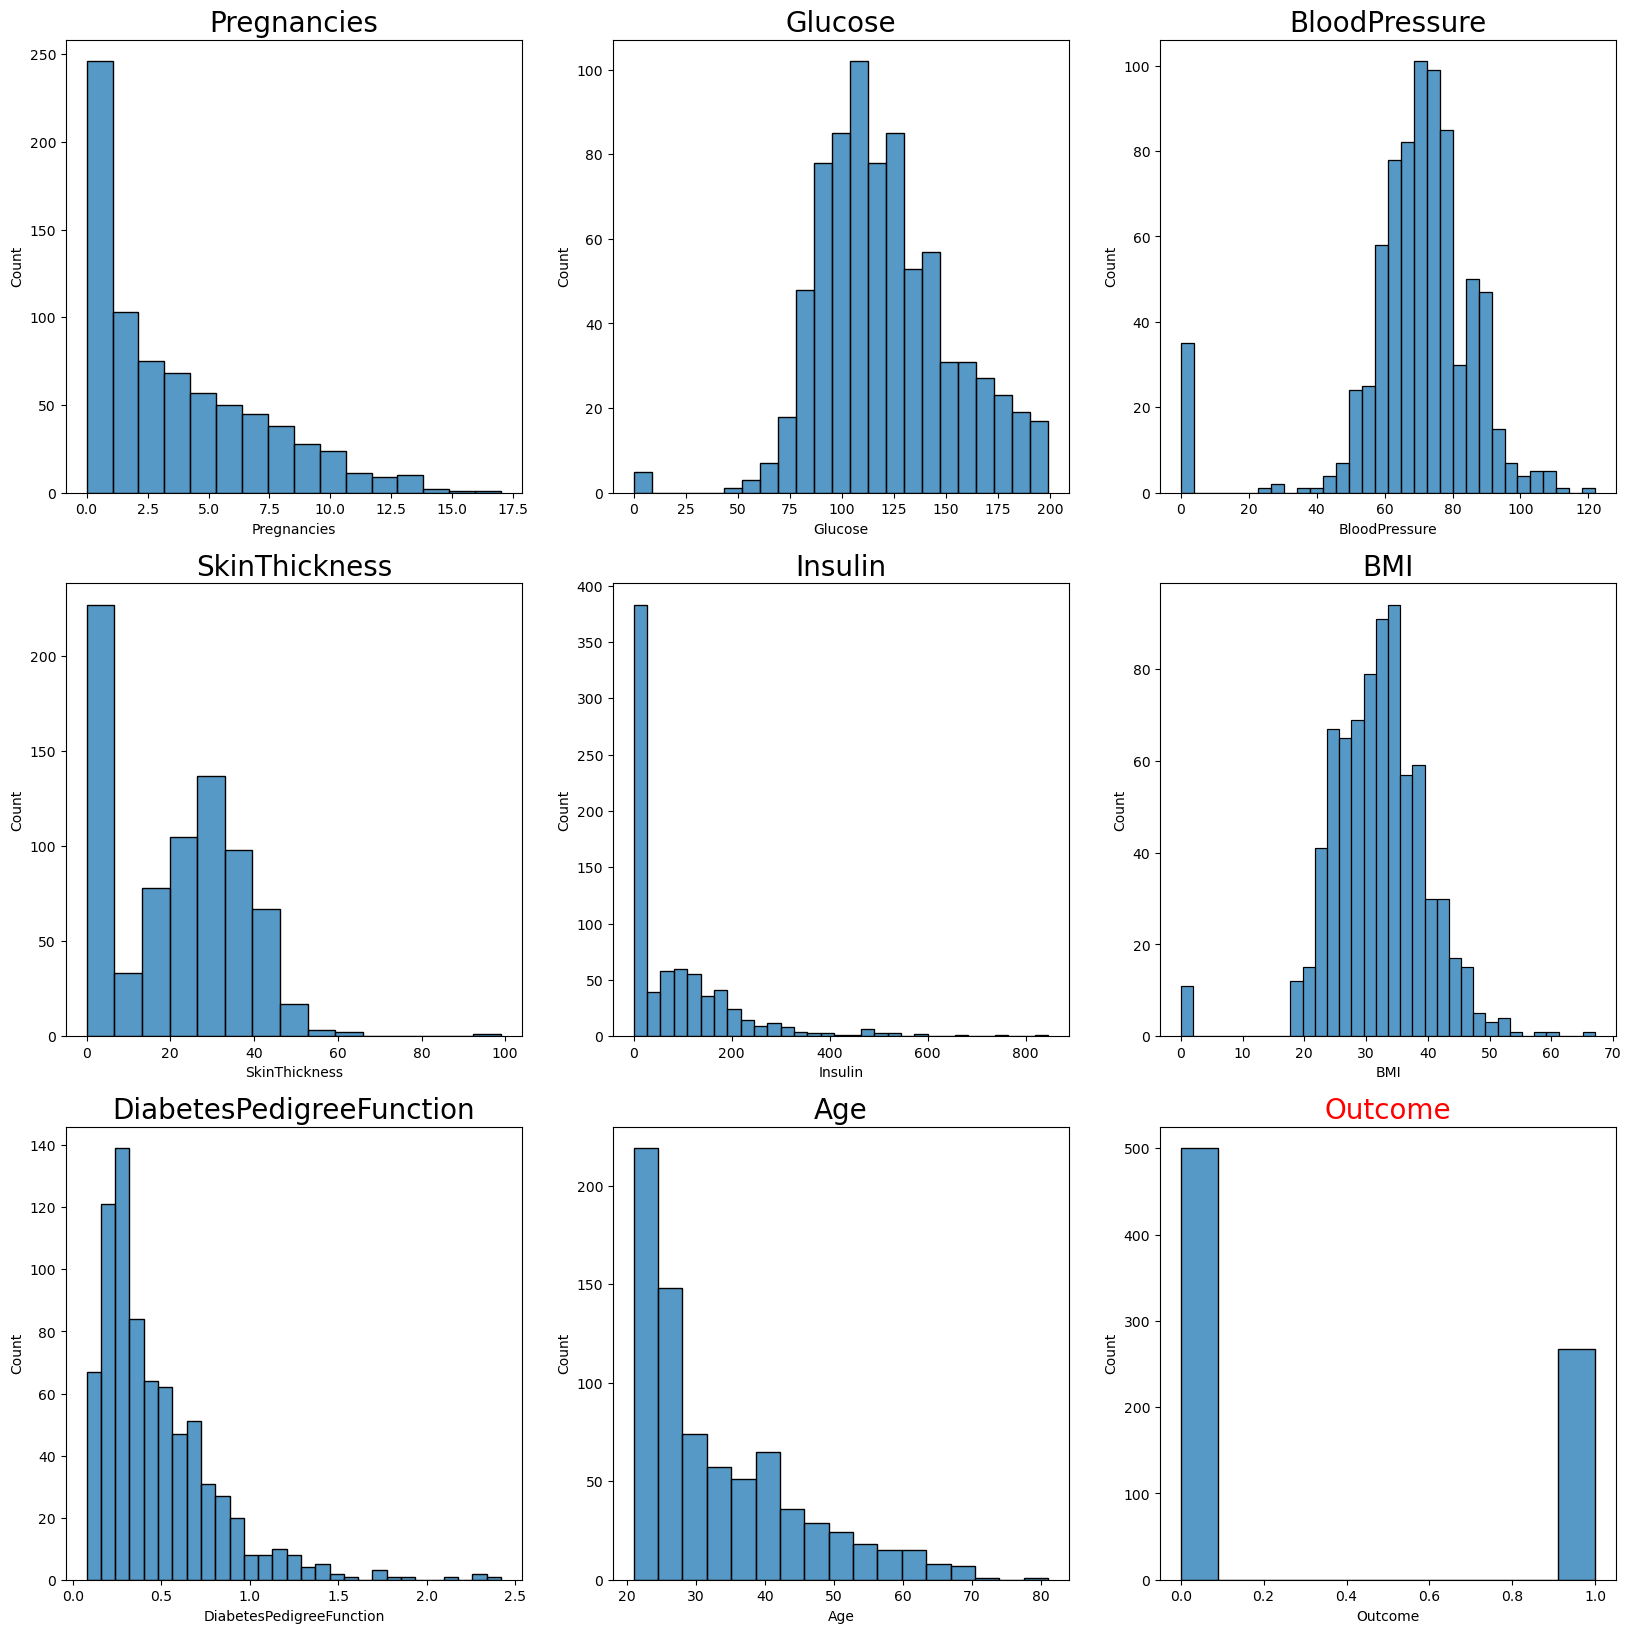

In [10]:
plt.figure(figsize=(20,20))

plt.subplot(3,3,1)
sns.histplot(dataset['Pregnancies'])
plt.title("Pregnancies", fontsize=20)

plt.subplot(3,3,2)
sns.histplot(dataset['Glucose'])
plt.title("Glucose", fontsize=20)

plt.subplot(3,3,3)
sns.histplot(dataset['BloodPressure'])
plt.title("BloodPressure", fontsize=20)


plt.subplot(3,3,4)
sns.histplot(dataset['SkinThickness'])
plt.title("SkinThickness", fontsize=20)

plt.subplot(3,3,5)
sns.histplot(dataset['Insulin'])
plt.title("Insulin", fontsize=20)

plt.subplot(3,3,6)
sns.histplot(dataset['BMI'])
plt.title("BMI", fontsize=20)

plt.subplot(3,3,7)
sns.histplot(dataset['DiabetesPedigreeFunction'])
plt.title("DiabetesPedigreeFunction", fontsize=20)

plt.subplot(3,3,8)
sns.histplot(dataset['Age'])
plt.title("Age", fontsize=20)


plt.subplot(3,3,9)
sns.histplot(dataset['Outcome'])
plt.title("Outcome", fontsize=20, color='red')


plt.show()

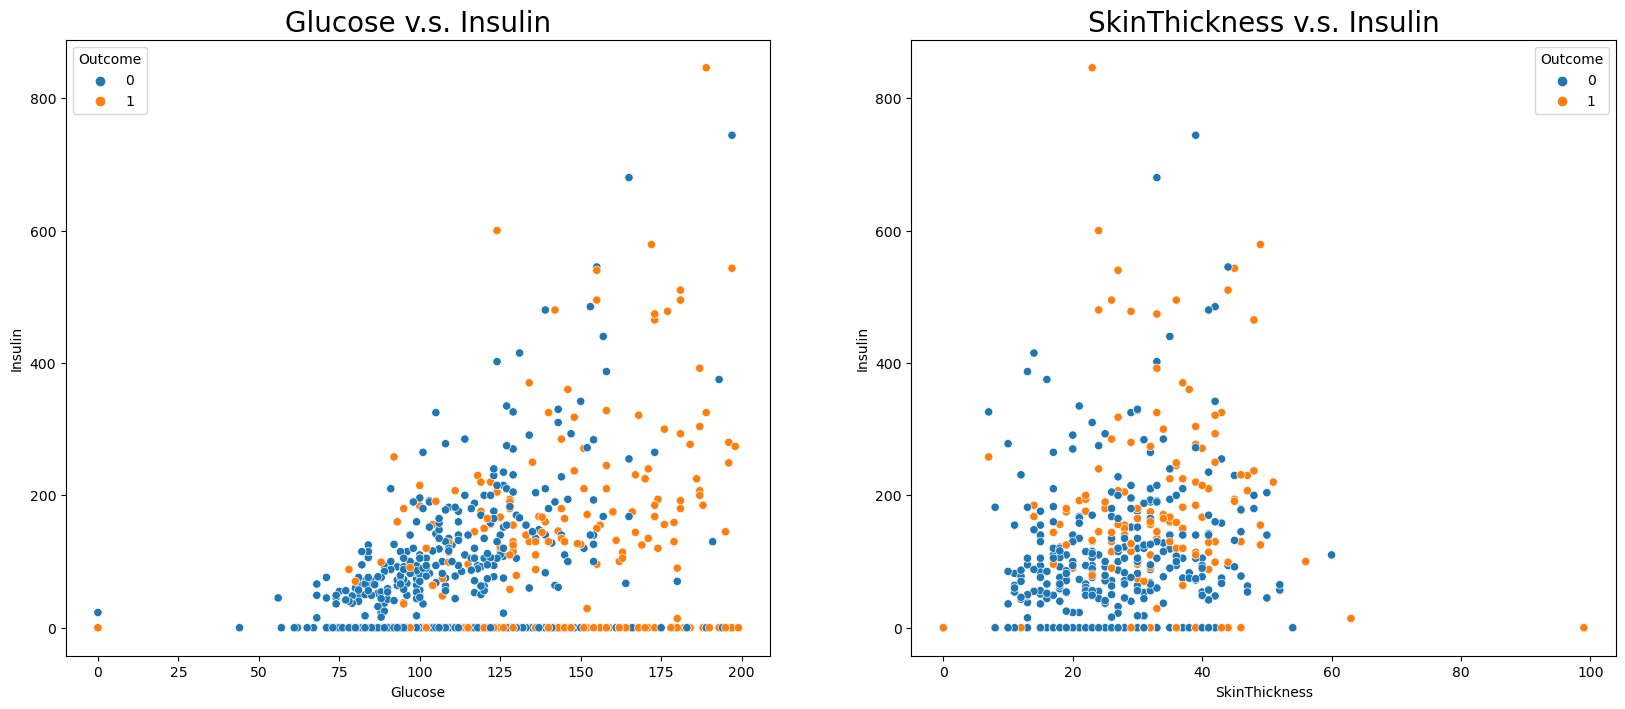

In [11]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.scatterplot(x='Glucose', y='Insulin', hue='Outcome', data=dataset)
plt.title("Glucose v.s. Insulin", fontsize=20)

plt.subplot(1,2,2)
sns.scatterplot(x='SkinThickness', y='Insulin', hue='Outcome', data=dataset)
plt.title("SkinThickness v.s. Insulin", fontsize=20)

plt.show()

## Splitting the dataset into the Training set and Test set

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [13]:
print(X_train)

[[0.00e+00 1.51e+02 9.00e+01 ... 4.21e+01 3.71e-01 2.10e+01]
 [1.00e+00 8.30e+01 6.80e+01 ... 1.82e+01 6.24e-01 2.70e+01]
 [2.00e+00 1.22e+02 7.00e+01 ... 3.68e+01 3.40e-01 2.70e+01]
 ...
 [4.00e+00 9.40e+01 6.50e+01 ... 2.47e+01 1.48e-01 2.10e+01]
 [1.10e+01 8.50e+01 7.40e+01 ... 3.01e+01 3.00e-01 3.50e+01]
 [5.00e+00 1.36e+02 8.20e+01 ... 0.00e+00 6.40e-01 6.90e+01]]


In [14]:
print(y_train)

[1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1
 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1
 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0
 0 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 0
 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0
 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 1
 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1
 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1 0 1 0
 1 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0
 1 1 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1
 0 0 0 0 1 0 1 0 0 0 1 1 

In [15]:
print(X_test)

[[1.000e+00 1.990e+02 7.600e+01 ... 4.290e+01 1.394e+00 2.200e+01]
 [2.000e+00 1.070e+02 7.400e+01 ... 3.360e+01 4.040e-01 2.300e+01]
 [4.000e+00 7.600e+01 6.200e+01 ... 3.400e+01 3.910e-01 2.500e+01]
 ...
 [1.000e+00 9.500e+01 6.000e+01 ... 2.390e+01 2.600e-01 2.200e+01]
 [1.000e+00 1.060e+02 7.600e+01 ... 3.750e+01 1.970e-01 2.600e+01]
 [1.000e+01 1.220e+02 7.800e+01 ... 2.760e+01 5.120e-01 4.500e+01]]


## Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
print(X_train)

[[-1.13311543  0.9144385   1.04559346 ...  1.22646853 -0.3002719
  -1.05654479]
 [-0.8391623  -1.19655127 -0.08570438 ... -1.75097771  0.45699051
  -0.55622332]
 [-0.54520916  0.01416345  0.01714088 ...  0.56619802 -0.39305899
  -0.55622332]
 ...
 [ 0.0426971  -0.85506763 -0.23997227 ... -0.941212   -0.96774035
  -1.05654479]
 [ 2.10036903 -1.13446334  0.22283139 ... -0.26848356 -0.51278428
   0.11087198]
 [ 0.33665024  0.44877899  0.63421243 ... -4.01832171  0.50488062
   2.94602702]]


In [18]:
print(X_test)

[[-0.8391623   2.40454892  0.32567665 ...  1.326132    2.7617022
  -0.97315788]
 [-0.54520916 -0.45149606  0.22283139 ...  0.16754413 -0.20149854
  -0.88977097]
 [ 0.0426971  -1.41385904 -0.39424016 ...  0.21737587 -0.24040926
  -0.72299714]
 ...
 [-0.8391623  -0.82402367 -0.49708542 ... -1.04087547 -0.63250956
  -0.97315788]
 [-0.8391623  -0.48254003  0.32567665 ...  0.65340356 -0.82107688
  -0.63961023]
 [ 1.8064159   0.01416345  0.42852191 ... -0.57993191  0.12175972
   0.94474111]]


## Training the Simple Logistic Regression model on the Training set

In [19]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Predicting the Test set results

In [20]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]

## Checking Confusion matrix

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[141  16]
 [ 35  39]]


0.7792207792207793

## K-fold Cross Validation

In [22]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 75.05 %
Standard Deviation: 5.07 %


# Extra Models

## Using KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

## Predicting the Test set results

In [24]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]

## Checking Confusion matrix

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[134  23]
 [ 30  44]]


0.7705627705627706

## K-fold Cross Validation

In [26]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 71.87 %
Standard Deviation: 4.07 %


## Elbow method 

In [27]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
error_rate 

[0.2857142857142857,
 0.2813852813852814,
 0.2727272727272727,
 0.23809523809523808,
 0.22943722943722944,
 0.24242424242424243,
 0.2554112554112554,
 0.23376623376623376,
 0.22943722943722944,
 0.24242424242424243,
 0.23376623376623376,
 0.24675324675324675,
 0.22077922077922077,
 0.23809523809523808,
 0.22510822510822512,
 0.23376623376623376,
 0.24242424242424243,
 0.23376623376623376,
 0.23809523809523808,
 0.2510822510822511,
 0.24242424242424243,
 0.2510822510822511,
 0.2554112554112554,
 0.24675324675324675,
 0.23376623376623376,
 0.24675324675324675,
 0.23376623376623376,
 0.23809523809523808,
 0.23376623376623376,
 0.23376623376623376,
 0.22943722943722944,
 0.2510822510822511,
 0.23809523809523808,
 0.24242424242424243,
 0.23376623376623376,
 0.22943722943722944,
 0.22943722943722944,
 0.22943722943722944,
 0.23376623376623376]

Text(0, 0.5, 'Error value')

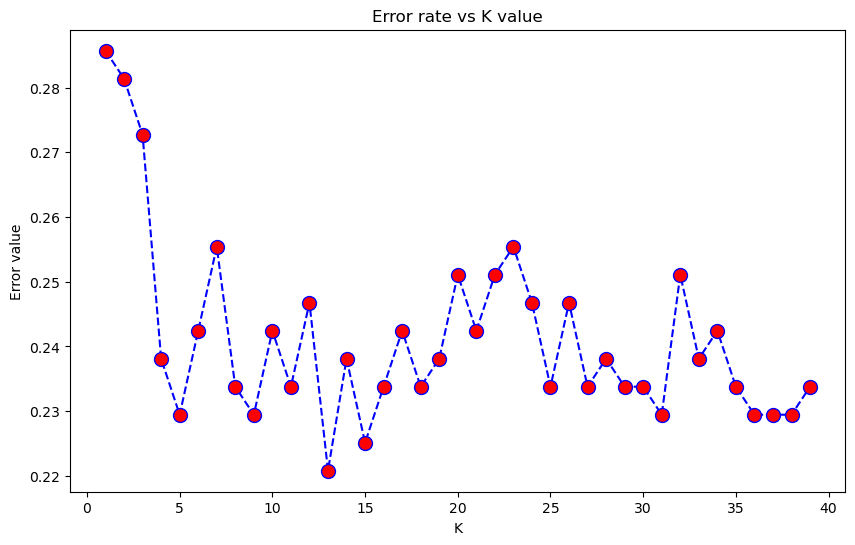

In [28]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error rate vs K value')
plt.xlabel('K')
plt.ylabel('Error value')

## Using KNN on neighbors = 13

In [29]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 13)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

##  Predicting the Test set results on neighbors = 13

In [30]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]

## Checking Confusion matrix on neighbors = 13

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[141  16]
 [ 35  39]]


0.7792207792207793

## K-fold Cross Validation on neighbors = 13

In [32]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 72.43 %
Standard Deviation: 6.08 %
